In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy


In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6d4c0d3cc516ab9e51f836ce460b1e14


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-1.6483169305252687 -94.63377893403413
12.080489682479012 -22.87159134027246
83.11099904359358 65.77293409817773
-16.257260597567594 -143.36547664400388
-13.832896796899533 -87.10789001451064
-71.33405050107963 162.3152710840888
44.86613979477306 79.10593499419855
55.52920730772419 155.17901156096775
50.569422739129664 -3.4050855527715385
18.981258788230676 -172.29153026992398
72.27363598308327 83.85681845403872
81.58050235878534 -32.30115336595031
58.90336501409158 -22.00056540443518
-49.225742305355766 166.45825711901767
-50.07950482576313 -111.03622912874374
38.613707960719665 -108.37433897060541
-22.91102602381818 102.16512136364224
39.62861110372941 178.57951798461085
2.848166035440485 173.36212380418988
71.09275633677919 2.7575088366540115
-39.8289061200294 -132.66815043392103
-14.373033682464339 178.20629332112804
11.523088952272644 -163.32750397739198
63.269410137808705 125.28037339388578
-0.38954110822098187 75.02795904688782
70.86370086453564 -107.40452839042248
44.0694263374

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | praia
Processing Record 3 of Set 1 | amderma
City not found. Skipping...
Processing Record 4 of Set 1 | tautira
Processing Record 5 of Set 1 | huarmey
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | tekeli
Processing Record 8 of Set 1 | sobolevo
Processing Record 9 of Set 1 | exmouth
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | karaul
City not found. Skipping...
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | vestmannaeyjar
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | grand junction
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | roald
Processing Record 20 of Set 1 | asau
Processing Record 21 of Set 1 | makakilo city
Processing Record 22 of Set 1 | berdigestyakh
Processin

Processing Record 40 of Set 4 | kununurra
Processing Record 41 of Set 4 | tadine
Processing Record 42 of Set 4 | senno
Processing Record 43 of Set 4 | new norfolk
Processing Record 44 of Set 4 | coquimbo
Processing Record 45 of Set 4 | rio gallegos
Processing Record 46 of Set 4 | shakawe
Processing Record 47 of Set 4 | kapit
Processing Record 48 of Set 4 | lorengau
Processing Record 49 of Set 4 | le vauclin
Processing Record 50 of Set 4 | atar
Processing Record 1 of Set 5 | trelew
Processing Record 2 of Set 5 | daru
Processing Record 3 of Set 5 | honavar
Processing Record 4 of Set 5 | altay
Processing Record 5 of Set 5 | caranavi
Processing Record 6 of Set 5 | codrington
Processing Record 7 of Set 5 | marsa matruh
Processing Record 8 of Set 5 | comodoro rivadavia
Processing Record 9 of Set 5 | collie
Processing Record 10 of Set 5 | mmathubudukwane
Processing Record 11 of Set 5 | clyde river
Processing Record 12 of Set 5 | metro
Processing Record 13 of Set 5 | gulshat
City not found. Sk

Processing Record 27 of Set 8 | tuatapere
Processing Record 28 of Set 8 | tocopilla
Processing Record 29 of Set 8 | barawe
City not found. Skipping...
Processing Record 30 of Set 8 | halalo
City not found. Skipping...
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | hunchun
Processing Record 33 of Set 8 | argelia
Processing Record 34 of Set 8 | ilhabela
Processing Record 35 of Set 8 | bethel
Processing Record 36 of Set 8 | ulladulla
Processing Record 37 of Set 8 | beloye
Processing Record 38 of Set 8 | toms river
Processing Record 39 of Set 8 | stromness
Processing Record 40 of Set 8 | makasar
Processing Record 41 of Set 8 | bichura
Processing Record 42 of Set 8 | bandarbeyla
Processing Record 43 of Set 8 | wulanhaote
City not found. Skipping...
Processing Record 44 of Set 8 | arman
Processing Record 45 of Set 8 | bengkulu
Processing Record 46 of Set 8 | waiouru
Processing Record 47 of Set 8 | sal rei
Processing Record 48 of Set 8 | bathsheba
Processing Record 49

Processing Record 11 of Set 12 | izhma
Processing Record 12 of Set 12 | hirara
Processing Record 13 of Set 12 | saint anthony
Processing Record 14 of Set 12 | angoche
Processing Record 15 of Set 12 | ajdovscina
Processing Record 16 of Set 12 | tigzirt
Processing Record 17 of Set 12 | barreirinha
Processing Record 18 of Set 12 | nalut
Processing Record 19 of Set 12 | plymouth
Processing Record 20 of Set 12 | uyuni
Processing Record 21 of Set 12 | saleaula
City not found. Skipping...
Processing Record 22 of Set 12 | lagunas
Processing Record 23 of Set 12 | krasnokholmskiy
Processing Record 24 of Set 12 | omutinskoye
City not found. Skipping...
Processing Record 25 of Set 12 | tsabong
Processing Record 26 of Set 12 | annau
Processing Record 27 of Set 12 | rondonopolis
Processing Record 28 of Set 12 | pervomayskaya
Processing Record 29 of Set 12 | slave lake
Processing Record 30 of Set 12 | alice springs
Processing Record 31 of Set 12 | sorochinsk
Processing Record 32 of Set 12 | yongan
Pr

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,65.55,96,75,5.99,EC,2022-08-26 23:14:05
1,Praia,14.9215,-23.5087,80.51,77,47,5.77,CV,2022-08-26 23:14:06
2,Tautira,-17.7333,-149.1500,76.39,71,9,8.32,PF,2022-08-26 23:14:07
3,Huarmey,-10.0681,-78.1522,63.93,79,1,11.83,PE,2022-08-26 23:14:07
4,Bluff,-46.6000,168.3333,46.80,81,100,7.25,NZ,2022-08-26 23:14:08
5,Tekeli,44.8300,78.8239,52.97,43,84,5.86,KZ,2022-08-26 23:14:08
6,Sobolevo,54.4299,31.8996,64.45,59,53,6.78,RU,2022-08-26 23:14:09
7,Exmouth,50.6172,-3.4023,61.09,89,32,7.40,GB,2022-08-26 23:14:09
8,Kapaa,22.0752,-159.3190,84.52,68,40,10.36,US,2022-08-26 23:14:10
9,Vestmannaeyjar,63.4427,-20.2734,48.88,59,8,18.68,IS,2022-08-26 23:14:10


In [29]:
new_column_order= ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-08-26 23:14:05,-0.7393,-90.3518,65.55,96,75,5.99
1,Praia,CV,2022-08-26 23:14:06,14.9215,-23.5087,80.51,77,47,5.77
2,Tautira,PF,2022-08-26 23:14:07,-17.7333,-149.1500,76.39,71,9,8.32
3,Huarmey,PE,2022-08-26 23:14:07,-10.0681,-78.1522,63.93,79,1,11.83
4,Bluff,NZ,2022-08-26 23:14:08,-46.6000,168.3333,46.80,81,100,7.25
5,Tekeli,KZ,2022-08-26 23:14:08,44.8300,78.8239,52.97,43,84,5.86
6,Sobolevo,RU,2022-08-26 23:14:09,54.4299,31.8996,64.45,59,53,6.78
7,Exmouth,GB,2022-08-26 23:14:09,50.6172,-3.4023,61.09,89,32,7.40
8,Kapaa,US,2022-08-26 23:14:10,22.0752,-159.3190,84.52,68,40,10.36
9,Vestmannaeyjar,IS,2022-08-26 23:14:10,63.4427,-20.2734,48.88,59,8,18.68


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

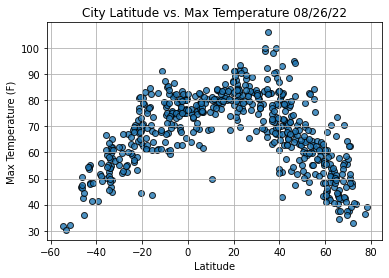

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

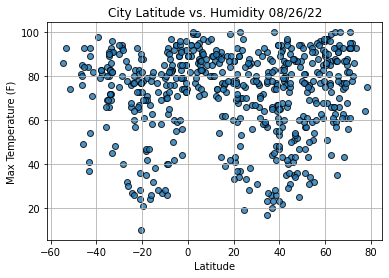

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

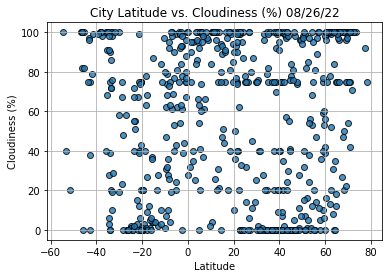

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

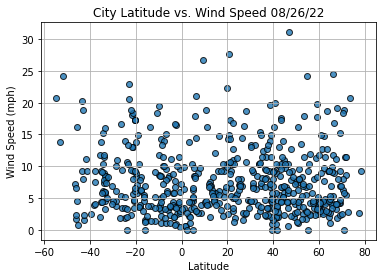

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                   Nikolskoye
Country                        RU
Date          2022-08-26 23:14:12
Lat                       59.7035
Lng                       30.7861
Max Temp                    59.88
Humidity                       96
Cloudiness                      0
Wind Speed                   2.46
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4      False
       ...  
563     True
564     True
565     True
566    False
567     True
Name: Lat, Length: 568, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Praia,CV,2022-08-26 23:14:06,14.9215,-23.5087,80.51,77,47,5.77
5,Tekeli,KZ,2022-08-26 23:14:08,44.8300,78.8239,52.97,43,84,5.86
6,Sobolevo,RU,2022-08-26 23:14:09,54.4299,31.8996,64.45,59,53,6.78
7,Exmouth,GB,2022-08-26 23:14:09,50.6172,-3.4023,61.09,89,32,7.40
8,Kapaa,US,2022-08-26 23:14:10,22.0752,-159.3190,84.52,68,40,10.36


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

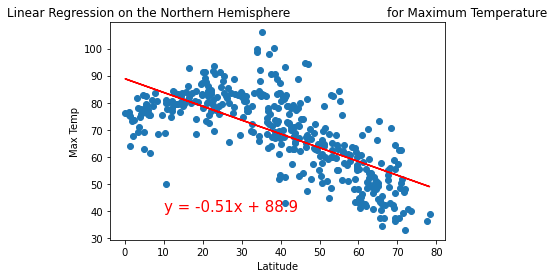

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

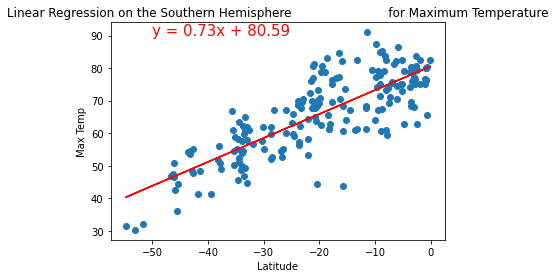

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

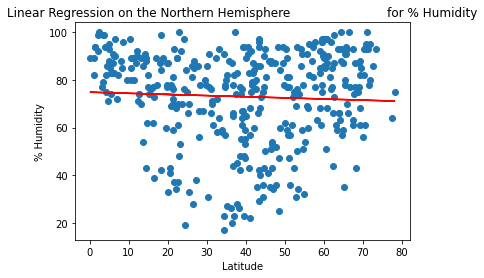

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(50,10))

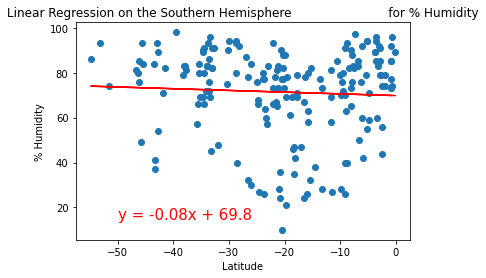

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

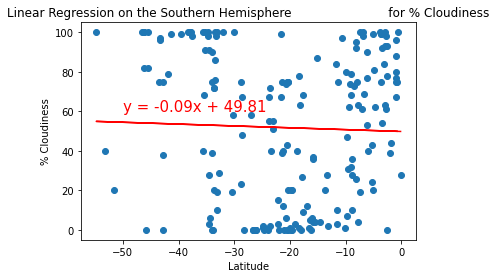

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

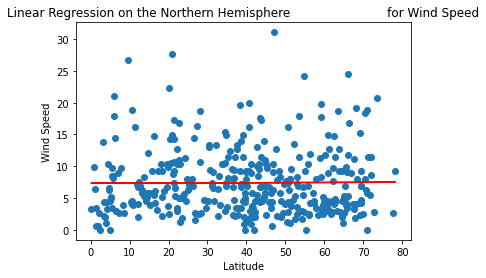

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

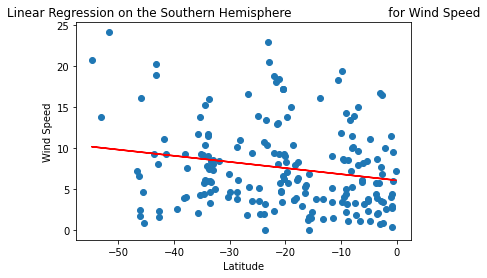

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))